# Project 3: Investigate the TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this project is to analyze a dataset and communicate findings about it.  The primary analysis tools are the Python libraries [NumPy](http://www.numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/).  [Seaborn](https://seaborn.pydata.org/) will also be used to enhance Matplotlib visualizations.  This project will rely solely on descriptive statistics for all resulting information.  The analysis needs to look at at least one dependent and three independent variables.

Data Source:
* Original Source - [TheMovieDb.org](https://www.themoviedb.org/)
* Data based on [a Kaggle Dataset of 5,000 Movies from TMDb](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
* Actual Data used cleaned by Udacity DAND Team and put into CSV form

Questions considered:
* Overall statistics from movie titles in dataset:
    * Most popular films?
    * Highest budget films?
    * Highest revenue films?
    * Highest margin films?
    *  Most successful directors?
    * Most popular genres?
    * Popularity of genres over time?
    * Most successful production companies?
    * Most popular actors/actresses?
* What kinds of properties are associated with high revenue movies? (dependent variable)
    * directors, genres, production companies, cast (features with multiple values - independent variables)
    * runtime, budget, release month (features with single value - independent variables)

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Allow logarithmic axis without using 10**x tick labels
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
# Use the IPython display method for nicely formatting Pandas DataFrames
# This method is used by default when viewing a single DataFrame at the end of an
# IPython cell within a Jupyter Notebook.  However, to view multiple DataFrames
# from a single cell and retain the nice formatting, this method must be
# explicitly invoked.
from IPython.display import display

# Jupyter Notebook/IPython setup
# Display matplotlib graphics inline
%matplotlib inline
# Change default floating point display from exponential to standard form with
# commas and two decimal places
pd.options.display.float_format = '{:,.2f}'.format

# General Matplotlib Parameters
# import matplotlib as mpl
# mpl.rcParams.update({'font.size': 12});
#
# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12
#
plt.rc('font', size=10)         # controls default text sizes
plt.rc('axes', titlesize=16)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)   # fontsize of the tick labels
plt.rc('ytick', labelsize=10)   # fontsize of the tick labels
plt.rc('legend', fontsize=12)   # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

<a id='wrangling'></a>
## Data Wrangling

* Load CSV data into a Pandas DataFrame
* Conduct high-level analysis - looking for null/missing values, problem values, data issues
* Remove/fix data issues
* Remove data not of interest in this analysis

### General Properties

In [2]:
# Load in Movie CSV
df = pd.read_csv('tmdb-movies.csv')
# How many rows and columns?
df.shape

(10866, 21)

In [3]:
# Preview first few rows
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


In [4]:
# Overall DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Overall DataFrame stats:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


##### This analysis seeks only to look at typical films
> From reviewing Wikipedia, [a Low-budget film](https://en.wikipedia.org/wiki/Low-budget_film), the minimum cutoff to be considered in this analysis is set at `$100,000` for the adjusted budget or `$1,000,000` for the adjusted revenue.

In [6]:
# Only investigate titles with an adjusted budget >= $100,000 or an adjusted revenue >= $1,000,000
df.query('budget_adj < 100000 & revenue_adj < 1000000').shape

(5061, 21)

In [7]:
# Prune titles not meeting above criteria
df = df.query('budget_adj >= 100000 | revenue_adj >= 1000000')

In [8]:
# Re-examine DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5805 entries, 0 to 10865
Data columns (total 21 columns):
id                      5805 non-null int64
imdb_id                 5805 non-null object
popularity              5805 non-null float64
budget                  5805 non-null int64
revenue                 5805 non-null int64
original_title          5805 non-null object
cast                    5796 non-null object
homepage                1805 non-null object
director                5801 non-null object
tagline                 5106 non-null object
keywords                5443 non-null object
overview                5805 non-null object
runtime                 5805 non-null int64
genres                  5805 non-null object
production_companies    5667 non-null object
release_date            5805 non-null object
vote_count              5805 non-null int64
vote_average            5805 non-null float64
release_year            5805 non-null int64
budget_adj              5805 non-null flo

In [9]:
# Remove nulls from columns of interest:
# cast, director, production_companies
# These are areas that will be analyzed later
df = df[df['cast'].notnull() & df['director'].notnull() & df['production_companies'].notnull()]
df.shape

(5659, 21)

In [10]:
# Helper function to enumerate dataframe columns
def col_enum(df):
    output = ''
    
    for n, col in enumerate(df.columns):
        output += f'{n}-{col}, '
        if len(output) >= 100:
            print(output)
            output = ''
    # Omit trailing comma
    print(output[:-2])

In [11]:
col_enum(df)

0-id, 1-imdb_id, 2-popularity, 3-budget, 4-revenue, 5-original_title, 6-cast, 7-homepage, 8-director, 
9-tagline, 10-keywords, 11-overview, 12-runtime, 13-genres, 14-production_companies, 15-release_date, 
16-vote_count, 17-vote_average, 18-release_year, 19-budget_adj, 20-revenue_adj


In [12]:
# Remove columns not of interest to this analysis:
# imdb id, budget and revenue (use adjusted ones), homepage, tagline, keywords
df = df.iloc[:, np.r_[:1, 2:3, 5:7, 8:9, 11:21]]
df.head(3)


,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"


In [13]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"5,659.00","5,659.00","5,659.00","5,659.00","5,659.00","5,659.00","5,659.00","5,659.00"
mean,"44,668.34",0.96,107.24,383.23,6.05,"2,000.46","33,532,752.17","98,508,097.12"
std,"72,626.01",1.28,22.97,758.97,0.86,12.03,"41,514,042.98","188,486,413.48"
min,5.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"8,884.50",0.35,94.00,36.00,5.50,"1,993.00","4,613,754.58","1,246,793.29"
50%,"12,662.00",0.61,103.00,112.00,6.10,"2,004.00","19,425,303.18","29,784,501.89"
75%,"41,611.00",1.11,117.00,363.00,6.60,"2,010.00","46,054,552.54","106,168,867.91"
max,"417,859.00",32.99,705.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41"


##### According to Wikipedia, [a Feature Film or Movie](https://en.wikipedia.org/wiki/Feature_film) has a minimum length of 40 minutes.

In [14]:
df.query('runtime < 40')['id'].count()

12

In [15]:
# Only look at titles with a runtime of 40 minutes or more
df = df.query('runtime >= 40')

In [16]:
# Check for duplicate values:
sum(df.duplicated())

1

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5646 entries, 0 to 10865
Data columns (total 15 columns):
id                      5646 non-null int64
popularity              5646 non-null float64
original_title          5646 non-null object
cast                    5646 non-null object
director                5646 non-null object
overview                5646 non-null object
runtime                 5646 non-null int64
genres                  5646 non-null object
production_companies    5646 non-null object
release_date            5646 non-null object
vote_count              5646 non-null int64
vote_average            5646 non-null float64
release_year            5646 non-null int64
budget_adj              5646 non-null float64
revenue_adj             5646 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 551.4+ KB


In [19]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
# Create a release_month column
df['release_month'] = df['release_date'].dt.month

In [21]:
# Create margin column based on adjusted budget and revenue
df['margin'] = (df['revenue_adj'] - df['budget_adj'])/df['revenue_adj'] * 100

In [22]:
# Check margin values
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,margin
count,"5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00"
mean,"44,577.93",0.96,107.44,383.86,6.05,"2,000.46","33,589,679.14","98,726,599.19",6.93,-inf
std,"72,551.15",1.28,22.59,759.71,0.86,12.02,"41,536,386.17","188,647,324.59",3.39,nan
min,5.00,0.00,40.00,10.00,1.50,"1,960.00",0.00,0.00,1.00,-inf
25%,"8,879.25",0.35,94.00,36.00,5.50,"1,993.00","4,680,166.76","1,316,907.85",4.00,-462.35
50%,"12,646.00",0.61,103.00,113.00,6.10,"2,004.00","19,470,044.85","29,958,402.64",7.00,45.12
75%,"41,545.75",1.11,117.00,363.00,6.60,"2,010.00","46,054,552.54","106,655,984.27",10.00,81.22
max,"417,859.00",32.99,705.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00,100.00


In [23]:
# Find lowest margin titles:
df.query('margin < -99999999.99').sort_values('margin', ascending=False)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,margin
8226,48781,0.18,Never Talk to Strangers,Rebecca De Mornay|Antonio Banderas|Dennis Mill...,Peter Hall,"Sarah Taylor, a police psychologist, meets a m...",86,Thriller|Romance,TriStar Pictures,1995-10-20,15,4.50,1995,"9,158,187.95",8.59,10,"-106,666,566.67"
7158,14844,0.42,Chasing Liberty,Mandy Moore|Stark Sands|Tony Jayawardena|Jerem...,Andy Cadiff,"The President's daughter, unable to experience...",111,Comedy|Romance,Alcon Entertainment|ETIC Films|C.R.G. Internat...,2004-01-09,86,6.20,2004,"26,552,244.20",13.85,1,"-191,666,566.67"
8523,9431,0.58,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,Private eye Rafe Guttman (Dennis Miller) is hi...,87,Horror|Comedy,Tales From The Crypt Holdings|Universal City S...,1996-08-16,27,4.90,1996,"20,853,251.08",6.95,8,"-299,999,900.00"
8142,2293,0.55,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,"Both dumped by their girlfriends, two best fri...",94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.80,1995,"8,585,801.20",2.86,10,"-299,999,900.00"
5067,13537,0.46,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,Fact-based 2003 drama about the young journali...,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.40,2003,"7,112,115.87",2.37,11,"-299,999,900.00"
10307,2259,0.45,The House of the Spirits,Meryl Streep|Glenn Close|Jeremy Irons|Winona R...,Bille August,"A rancher, his clairvoyant wife and their fami...",140,Romance|Drama,Det Danske Filminstitut|Spring Creek Productio...,1993-10-19,52,6.70,1993,"37,736,749.04",9.06,10,"-416,666,566.67"
7487,2312,0.76,In the Name of the King: A Dungeon Siege Tale,Jason Statham|John Rhys-Davies|Ray Liotta|Leel...,Uwe Boll,A man named Farmer sets out to rescue his kidn...,127,Adventure|Fantasy|Action|Drama,Boll Kino Beteiligungs GmbH & Co. KG|Brightlig...,2007-11-29,135,4.20,2007,"63,100,114.96",0.00,11,-inf
7240,12703,0.13,The Brown Bunny,Vincent Gallo|ChloÃ« Sevigny|Cheryl Tiegs|Eliz...,Vincent Gallo,Bud Clay races motorcycles in the 250cc Formul...,93,Drama,Wild Bunch|KinÃ©tique Inc.|Vincent Gallo Produ...,2004-08-27,23,5.50,2004,"11,544,454.00",0.00,8,-inf
7280,15516,0.38,The Last House on the Left,Sandra Peabody|Lucy Grantham|David Hess|Fred J...,Wes Craven,"Mari and Phyllis go to the ""big city"" to see t...",84,Horror|Thriller,Lobster Enterprises|Sean S. Cunningham Films|T...,1972-01-01,46,6.10,1972,"469,310.48",0.00,1,-inf
7279,32613,0.38,Horror Express,Christopher Lee|Peter Cushing|Telly Savalas|Al...,Eugenio MartÃ­n,Mysterious and unearthly deaths start to occur...,90,Horror,Granada Films|Benmar Productions,1972-09-30,19,6.60,1972,"1,564,368.28",0.00,9,-inf


In [24]:
# Because we have 0 for budget and revenue, there are some issues:
# We don't have 0 for both - that was filtered out above
# Where budget = 0, margin is 100 - we'll deal with this later
# Where revenue = 0, margin is -inf, we need to put in a workable value
# We'll use -999,999,999.99 as a substitute for -infinity

# Replace -inf with -999,999,999.99
df['margin'] = df['margin'].replace(-np.inf, -999999999.99)

# Check
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,margin
count,"5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00"
mean,"44,577.93",0.96,107.44,383.86,6.05,"2,000.46","33,589,679.14","98,726,599.19",6.93,"-205,427,066.62"
std,"72,551.15",1.28,22.59,759.71,0.86,12.02,"41,536,386.17","188,647,324.59",3.39,"403,755,304.51"
min,5.00,0.00,40.00,10.00,1.50,"1,960.00",0.00,0.00,1.00,"-999,999,999.99"
25%,"8,879.25",0.35,94.00,36.00,5.50,"1,993.00","4,680,166.76","1,316,907.85",4.00,-462.35
50%,"12,646.00",0.61,103.00,113.00,6.10,"2,004.00","19,470,044.85","29,958,402.64",7.00,45.12
75%,"41,545.75",1.11,117.00,363.00,6.60,"2,010.00","46,054,552.54","106,655,984.27",10.00,81.22
max,"417,859.00",32.99,705.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00,100.00


In [25]:
df.head(10)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,margin
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",6,90.09
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49",5,60.36
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41",3,62.74
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80",12,90.33
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,"174,799,923.09","1,385,748,801.47",4,87.39
5,281957,9.11,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.20,2015,"124,199,945.35","490,314,247.02",12,74.67
6,87101,8.65,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.80,2015,"142,599,937.26","405,355,075.68",6,64.82
7,286217,7.67,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.60,2015,"99,359,956.28","547,749,654.31",9,81.86
8,211672,7.40,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.50,2015,"68,079,970.04","1,064,192,016.80",6,93.60
9,150540,6.33,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.00,2015,"160,999,929.16","785,411,574.70",6,79.50


##### Notice the following columns are multi-valued:
* cast
* director
* genres
* production_companies
> Each value is separated by a bar ("|").
> In order to analyze each of these areas or features, we will split them into separate DataFrames which can be re-merged into the "master" DataFrame later as necessary.

In [26]:
# First create a function to split out the columns
def new_df(df, cols, verbose=False):
    '''df:       DataFrame to be processed
       cols:     List of columns to be extracted (assumed to be two elements)
                 The first column is the unique identifier which can be used to join
                 this DataFrame back to the master.  The second column is a set of
                 one or more elements separated by bars ('|').  These will be split
                 out so that each row of the resulting new DataFrame has only one
                 element (normalizing the data).
       verbose:  Display summary output
       
       Returns:  New two column DataFrame consisting of two elements in cols.  Data
                 will be split into rows of individual elements as described above.
    '''
    dftemp = df[[cols[0], cols[1]]]
    dfnew = pd.DataFrame()
    
    for row in dftemp.itertuples():
        _, col1, col2_psv = row
        col2_list = col2_psv.split('|')
        dfnew = dfnew.append(pd.DataFrame.from_records([(col1, i) for i in col2_list],
                                                       columns=[cols[0], cols[1]]))
    
    if verbose:
        print(f'New DF shape:  {dfnew.shape}')
        print(f'New DF head:\n{dfnew.head()}\n')
    return dfnew


In [27]:
# Split out cast, directors, genres, and production companies
dfcast = new_df(df, ['id', 'cast'], verbose=True)
dfdir = new_df(df, ['id', 'director'], verbose=True)
dfgenres = new_df(df, ['id', 'genres'], verbose=True)
dfprodco = new_df(df, ['id', 'production_companies'], verbose=True)

New DF shape:  (28116, 2)
New DF head:
       id                 cast
0  135397          Chris Pratt
1  135397  Bryce Dallas Howard
2  135397          Irrfan Khan
3  135397    Vincent D'Onofrio
4  135397        Nick Robinson

New DF shape:  (6065, 2)
New DF head:
       id          director
0  135397   Colin Trevorrow
0   76341     George Miller
0  262500  Robert Schwentke
0  140607       J.J. Abrams
0  168259         James Wan

New DF shape:  (14779, 2)
New DF head:
       id           genres
0  135397           Action
1  135397        Adventure
2  135397  Science Fiction
3  135397         Thriller
0   76341           Action

New DF shape:  (14789, 2)
New DF head:
       id     production_companies
0  135397        Universal Studios
1  135397     Amblin Entertainment
2  135397       Legendary Pictures
3  135397  Fuji Television Network
4  135397                   Dentsu



In [28]:
col_enum(df)

0-id, 1-popularity, 2-original_title, 3-cast, 4-director, 5-overview, 6-runtime, 7-genres, 8-production_companies, 
9-release_date, 10-vote_count, 11-vote_average, 12-release_year, 13-budget_adj, 14-revenue_adj, 15-release_month, 
16-margin


In [29]:
# Now remove multi-value columns from "master" dataframe
# cast, director, genres, production_companies
df = df.iloc[:, np.r_[:3, 5:7, 9:17]]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Let's take a look at the movie data

In [30]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,margin
count,"5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00","5,646.00"
mean,"44,577.93",0.96,107.44,383.86,6.05,"2,000.46","33,589,679.14","98,726,599.19",6.93,"-205,427,066.62"
std,"72,551.15",1.28,22.59,759.71,0.86,12.02,"41,536,386.17","188,647,324.59",3.39,"403,755,304.51"
min,5.00,0.00,40.00,10.00,1.50,"1,960.00",0.00,0.00,1.00,"-999,999,999.99"
25%,"8,879.25",0.35,94.00,36.00,5.50,"1,993.00","4,680,166.76","1,316,907.85",4.00,-462.35
50%,"12,646.00",0.61,103.00,113.00,6.10,"2,004.00","19,470,044.85","29,958,402.64",7.00,45.12
75%,"41,545.75",1.11,117.00,363.00,6.60,"2,010.00","46,054,552.54","106,655,984.27",10.00,81.22
max,"417,859.00",32.99,705.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00,100.00


In [31]:
col_enum(df)

0-id, 1-popularity, 2-original_title, 3-overview, 4-runtime, 5-release_date, 6-vote_count, 7-vote_average, 
8-release_year, 9-budget_adj, 10-revenue_adj, 11-release_month, 12-margin


### Visualize distribution of movies for key features

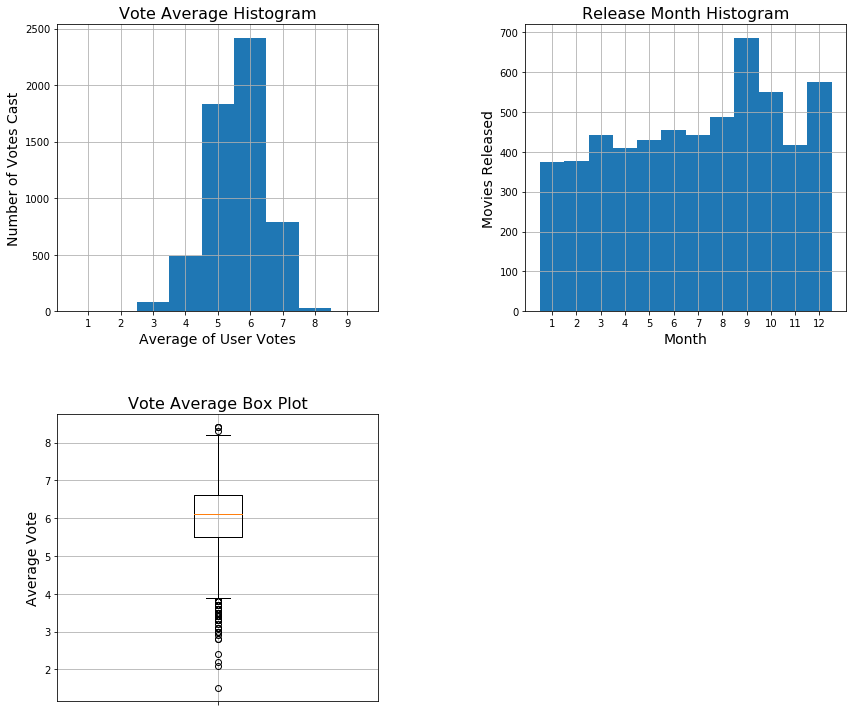

In [32]:
# Start with vote_average and release_month

# Vote Average
plt.subplot(221)
plt.title('Vote Average Histogram')
plt.xlabel('Average of User Votes')
plt.ylabel('Number of Votes Cast')
plt.grid(True)
df['vote_average'].hist(bins=[1,2,3,4,5,6,7,8,9,10], align='left', figsize=(12,10))
plt.xticks([1,2,3,4,5,6,7,8,9])

plt.subplot(223)
plt.title('Vote Average Box Plot')
#plt.xlabel('Vote Distribution')
plt.ylabel('Average Vote')
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['vote_average'])

# Release Month
plt.subplot(222)
plt.title('Release Month Histogram')
plt.xlabel('Month')
plt.ylabel('Movies Released')
df['release_month'].hist(bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.tight_layout(w_pad=10, h_pad=5);

* Vote Average:  With a possible range from 0-10, most movies have a score of 5-6
* Release Month:  September seems to be the most popular release month from our set of movies

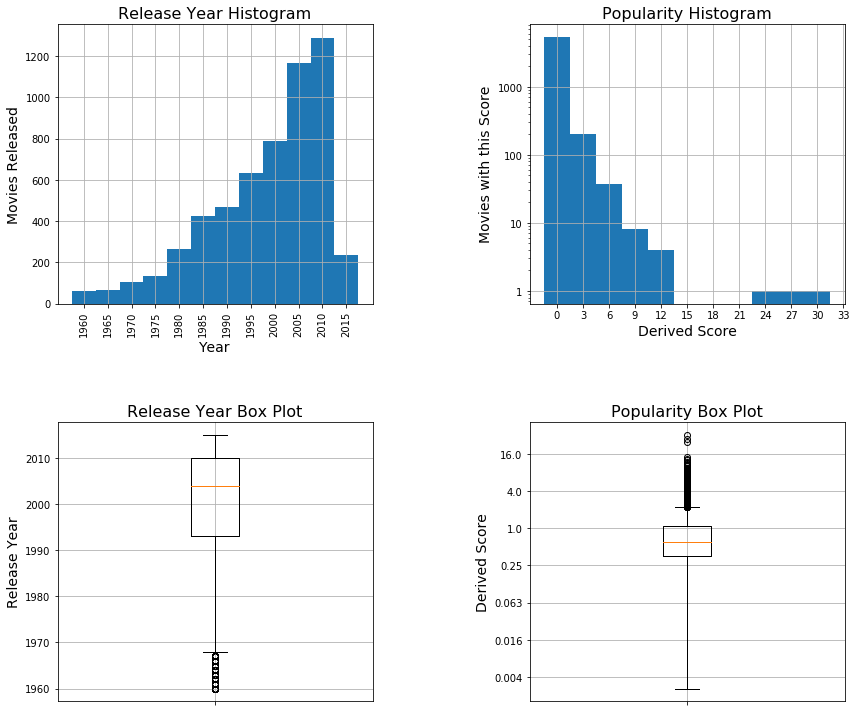

In [33]:
# Release Year
plt.subplot(221)
plt.title('Release Year Histogram')
plt.xlabel('Year')
plt.ylabel('Movies Released')
df['release_year'].hist(bins=[1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020], align='left', figsize=(12,10));
plt.xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015], rotation=90)

plt.subplot(223)
plt.title('Release Year Box Plot')
plt.ylabel('Release Year')
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['release_year'])

# Popularity
plt.subplot(222)
plt.title('Popularity Histogram')
plt.xlabel('Derived Score')
plt.ylabel('Movies with this Score')
plt.grid(True)
df['popularity'].hist(bins=[0,3,6,9,12,15,18,21,24,27,30,33], align='left')
plt.xticks([0,3,6,9,12,15,18,21,24,27,30,33])
#plt.yticks([1,10,100,1000],['one','ten','hundred','thousand'])
#ax.set_xticks(np.arange(1,34), minor=True)
plt.yscale('log')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.subplot(224)
plt.title('Popularity Box Plot')
plt.ylabel('Derived Score')
plt.yscale('log', basey=2)
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['popularity'])
ax = plt.gca()
ax.set_yticklabels(['0.0', '0.001', '0.004', '0.016', '0.063', '0.25', '1.0', '4.0', '16.0'])

plt.tight_layout(w_pad=10, h_pad=5);

* Release Year:  While there are some movies from 1960-1989, the bulk of the movies are from the 90s and later.
* Popularity:  Most movies are not very popular!  Only a handful are exceptionally popular with a rapid exponential decay.

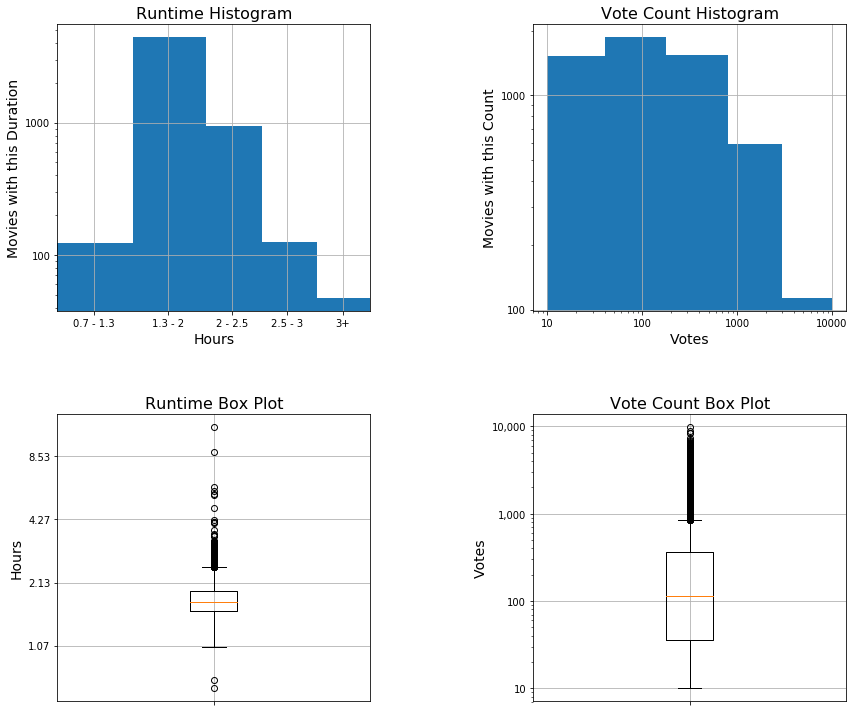

In [34]:
# Runtime
plt.subplot(221)
plt.title('Runtime Histogram')
plt.xlabel('Hours')
plt.ylabel('Movies with this Duration')
df['runtime'].hist(bins=[40,81,121,151,181,720], figsize=(12, 10))
plt.xticks([0,60,100,135,165,195])
plt.xlim(xmin=40, xmax=210)
plt.yscale('log')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xticklabels(['0','0.7 - 1.3','1.3 - 2','2 - 2.5','2.5 - 3','3+'])

plt.subplot(223)
plt.title('Runtime Box Plot')
plt.ylabel('Hours')
plt.yscale('log', basey=2)
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['runtime'])
ax = plt.gca()
ax.set_yticklabels(['0.27', '0.53', '1.07', '2.13', '4.27', '8.53'])

# Vote Count
plt.subplot(222)
plt.title('Vote Count Histogram')
plt.xlabel('Votes')
plt.ylabel('Movies with this Count')
plt.grid(True)
df['vote_count'].hist(bins=[10,40,180,800,3000,10000])
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.subplot(224)
plt.title('Vote Count Box Plot')
plt.ylabel('Votes')
plt.yscale('log')
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['vote_count'])
ax = plt.gca()
ax.set_yticklabels(['0', '1', '10', '100', '1,000', '10,000'])

plt.tight_layout(w_pad=10, h_pad=5);

* Runtime:  Most movies run for an hour and 20 minutes to two and half hours
* Vote Count:  Most movies get less than a 1,000 votes with the ones getting more rapidly declining

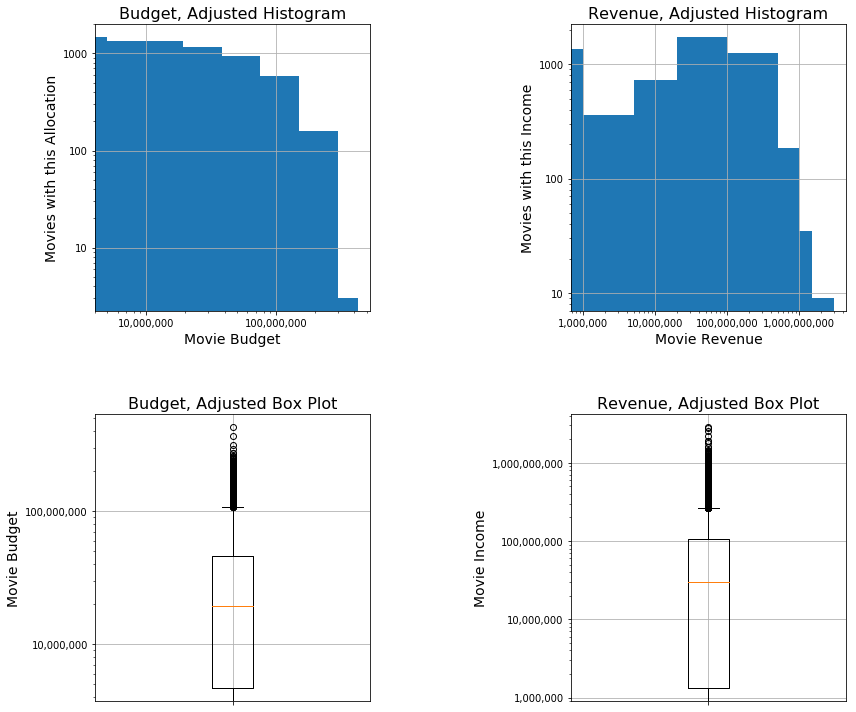

In [35]:
# Budget, Adjusted
plt.subplot(221)
plt.title('Budget, Adjusted Histogram')
plt.xlabel('Movie Budget')
plt.ylabel('Movies with this Allocation')
df['budget_adj'].hist(figsize=(12, 10), bins=[0.0, 5_000_000.0, 19_000_000.0, 38_000_000.0,
                                             75_000_000.0, 150_000_000.0, 300_000_000.0, 425_000_000.0])
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
# Couldn't get this to work:
#ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.set_xticks([100_000.0, 1_000_000.0, 10_000_000.0, 100_000_000.0, 1_000_000_000.0, 10_000_000_000.0])
ax.set_xticklabels(['100,000', '1,000,000', '10,000,000', '100,000,000', '1,000,000,000', '10,000,000,000'])

plt.subplot(223)
plt.title('Budget, Adjusted Box Plot')
plt.ylabel('Movie Budget')
plt.yscale('log')
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['budget_adj'])
ax = plt.gca()
ax.set_yticklabels(['100,000', '1,000,000', '10,000,000', '100,000,000'])

# Revenue, Adjusted
plt.subplot(222)
plt.title('Revenue, Adjusted Histogram')
plt.xlabel('Movie Revenue')
plt.ylabel('Movies with this Income')
plt.grid(True)
df['revenue_adj'].hist(bins=[0, 1_000_000, 5_000_000, 20_000_000, 100_000_000, 500_000_000,
                             1_000_000_000, 1_500_000_000, 3_000_000_000])
plt.xscale('log')
plt.yscale('log')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
#ax.set_xticks([100_000.0, 1_000_000.0, 10_000_000.0, 100_000_000.0, 1_000_000_000.0, 10_000_000_000.0])
ax.set_xticklabels(['10,000', '100,000', '1,000,000', '10,000,000', '100,000,000', '1,000,000,000',
                    '10,000,000,000', '100,000,000,000'])

plt.subplot(224)
plt.title('Revenue, Adjusted Box Plot')
plt.ylabel('Movie Income')
plt.yscale('log')
plt.grid(True)
plt.tick_params(axis='x', labelbottom='off')
plt.boxplot(df['revenue_adj'])
ax = plt.gca()
ax.set_yticklabels(['10,000', '100,000', '1,000,000', '10,000,000', '100,000,000', '1,000,000,000'])

plt.tight_layout(w_pad=10, h_pad=5);

* Budget, Adjusted:  Most movies have a budget well under 100 million
* Revenue, Adjusted:  Most movies make under 100 million

In [36]:
# Eliminate invalid/unreasonable values:
# Worst accepted margin is -999,999.99%
# Best accepted margin is 99.995%
# Values outside this range deemed erroneous
#df.query('margin > -999_999.99 & margin <= 99.995').sort_values('margin', ascending=False)
print(df.query('margin > -999_999.99 & margin <= 99.995')['margin'].describe().to_string())

count      3,762.00
mean        -923.06
std       14,693.89
min     -561,539.99
25%          -12.29
50%           53.09
75%           76.24
max           99.99


* Margin:  Looking soley at simple margin percentage, the average film loses money

### Research Question Set 1
* Overall statistics from movie titles in dataset:
    * Most popular films?
    * Highest budget films?
    * Highest revenue films?
    * Highest margin films?
    *  Most successful directors?
    * Most popular genres?
    * Popularity of genres over time?
    * Most successful production companies?
    * Most popular actors/actresses?

In [37]:
col_enum(df)

0-id, 1-popularity, 2-original_title, 3-overview, 4-runtime, 5-release_date, 6-vote_count, 7-vote_average, 
8-release_year, 9-budget_adj, 10-revenue_adj, 11-release_month, 12-margin


#### Ten most popular films

In [38]:
# By popularity index
for elmt in ['popularity', 'vote_average', 'vote_count']:
    # Note - excluding id, release_year and release_month (already in release_date) columns
    category = elmt.replace('_', ' ')
    print(f'Ten most popular movies by {category}:')
    display(df.nlargest(10, elmt).iloc[:, np.r_[1:8, 9:11, 12:13]])
    print('\n')

Ten most popular movies by popularity:


,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
0,32.99,Jurassic World,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.50,"137,999,939.28","1,392,445,892.52",90.09
1,28.42,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,2015-05-13,6185,7.10,"137,999,939.28","348,161,292.49",60.36
629,24.95,Interstellar,Interstellar chronicles the adventures of a gr...,169,2014-11-05,6498,8.00,"151,980,023.38","572,690,645.12",73.46
630,14.31,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",121,2014-07-30,5612,7.90,"156,585,478.63","712,291,130.17",78.02
2,13.11,Insurgent,Beatrice Prior must confront her inner demons ...,119,2015-03-18,2480,6.30,"101,199,955.47","271,619,025.41",62.74
631,12.97,Captain America: The Winter Soldier,After the cataclysmic events in New York with ...,136,2014-03-20,3848,7.60,"156,585,478.63","658,365,092.86",76.22
1329,12.04,Star Wars,Princess Leia is captured and held hostage by ...,121,1977-03-20,4428,7.90,"39,575,591.36","2,789,712,242.28",98.58
632,11.42,John Wick,"After the sudden death of his beloved wife, Jo...",101,2014-10-22,2712,7.00,"18,421,821.02","72,526,614.47",74.60
3,11.17,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.50,"183,999,919.04","1,902,723,129.80",90.33
633,10.74,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,123,2014-11-18,3590,6.60,"115,136,381.35","692,752,790.22",83.38




Ten most popular movies by vote average:


,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
4178,7.19,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,142,1994-09-10,5754,8.40,"36,777,789.04","41,693,462.72",11.79
5986,0.05,"Guten Tag, RamÃ³n",After five failed attempts to go to the United...,119,2013-10-18,11,8.40,"3,744,133.41",0.00,"-999,999,999.99"
7948,0.28,Stop Making Sense,David Byrne walks onto the stage and does a so...,88,1984-11-16,23,8.40,"2,518,850.45","10,450,966.59",75.90
7269,5.74,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",175,1972-03-15,3970,8.30,"31,287,365.59","1,277,913,732.39",97.55
650,4.78,Whiplash,"Under the direction of a ruthless instructor, ...",105,2014-10-10,2372,8.20,"3,039,600.47","12,888,912.73",76.42
2389,0.05,Bill Cunningham New York,Chronicles a man who is obsessively interested...,84,2010-03-24,16,8.10,0.00,"1,339,650.00",100.00
2409,8.95,Fight Club,A ticking-time-bomb insomniac and a slippery s...,139,1999-10-14,5923,8.10,"82,470,329.34","132,022,892.45",37.53
2875,8.47,The Dark Knight,Batman raises the stakes in his war on crime. ...,152,2008-07-16,8432,8.10,"187,365,527.25","1,014,733,032.48",81.54
3826,0.15,Kill Bill: The Whole Bloody Affair,Kill Bill: The Whole Bloody affair is a comple...,247,2011-03-28,28,8.10,"29,081,941.28",0.00,"-999,999,999.99"
4177,8.09,Pulp Fiction,"A burger-loving hit man, his philosophical par...",154,1994-10-14,5343,8.10,"11,768,892.49","314,713,075.14",96.26




Ten most popular movies by vote count:


,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
1919,9.36,Inception,"Cobb, a skilled thief who commits corporate es...",148,2010-07-14,9767,7.90,"160,000,000.00","825,500,000.00",80.62
4361,7.64,The Avengers,When an unexpected enemy emerges and threatens...,143,2012-04-25,8903,7.30,"208,943,741.90","1,443,191,435.21",85.52
1386,9.43,Avatar,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,8458,7.10,"240,886,902.89","2,827,123,750.41",91.48
2875,8.47,The Dark Knight,Batman raises the stakes in his war on crime. ...,152,2008-07-16,8432,8.10,"187,365,527.25","1,014,733,032.48",81.54
4364,5.94,Django Unchained,"With the help of a German bounty hunter, a fre...",165,2012-12-25,7375,7.70,"94,974,428.14","403,991,051.51",76.49
4382,2.57,The Hunger Games,Every year in the ruins of what was once North...,142,2012-03-12,7080,6.70,"71,230,821.10","656,473,401.94",89.15
5425,4.95,Iron Man 3,When Tony Stark's world is torn apart by a for...,130,2013-04-18,6882,6.90,"187,206,670.55","1,137,692,372.64",83.55
4363,6.59,The Dark Knight Rises,Following the death of District Attorney Harve...,165,2012-07-16,6723,7.50,"237,436,070.34","1,026,712,780.23",76.87
629,24.95,Interstellar,Interstellar chronicles the adventures of a gr...,169,2014-11-05,6498,8.00,"151,980,023.38","572,690,645.12",73.46
4367,4.22,The Hobbit: An Unexpected Journey,"Bilbo Baggins, a hobbit enjoying his quiet lif...",169,2012-11-26,6417,6.90,"237,436,070.34","965,893,322.82",75.42


#### Ten highest budget films

In [39]:
df.nlargest(10, 'budget_adj').iloc[:, np.r_[1:8, 9:11, 12:13]]

,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
2244,0.25,The Warrior's Way,An Asian assassin (Dong-gun Jang) is forced to...,100,2010-12-02,74,6.40,"425,000,000.00","11,087,569.00","-3,733.12"
3375,4.96,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,136,2011-05-11,3180,6.30,"368,371,256.18","990,417,500.35",62.81
7387,4.97,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",169,2007-05-19,2626,6.80,"315,500,574.79","1,010,653,507.91",68.78
6570,1.96,Superman Returns,"Set 5 years after the end of Superman II, the ...",154,2006-06-28,834,5.30,"292,050,672.74","423,020,463.77",30.96
5231,4.36,Titanic,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,4654,7.30,"271,692,064.21","2,506,405,735.42",89.16
7394,2.52,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,139,2007-05-01,2083,5.80,"271,330,494.32","936,901,700.22",71.04
1929,2.87,Tangled,When the kingdom's most wanted-and most charmi...,100,2010-11-24,2019,7.30,"260,000,000.00","591,794,936.00",56.07
14,5.94,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,141,2015-04-22,4304,7.40,"257,599,886.66","1,292,632,336.88",80.07
1389,5.08,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",153,2009-07-07,3220,7.30,"254,100,108.53","949,276,533.29",73.23
8089,1.23,Waterworld,In a futuristic world where the polar ice caps...,135,1995-07-28,557,5.80,"250,419,201.74","378,087,518.51",33.77


#### Ten highest revenue films

In [40]:
df.nlargest(10, 'revenue_adj').iloc[:, np.r_[1:8, 9:11, 12:13]]

,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
1386,9.43,Avatar,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,8458,7.10,"240,886,902.89","2,827,123,750.41",91.48
1329,12.04,Star Wars,Princess Leia is captured and held hostage by ...,121,1977-03-20,4428,7.90,"39,575,591.36","2,789,712,242.28",98.58
5231,4.36,Titanic,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,4654,7.30,"271,692,064.21","2,506,405,735.42",89.16
10594,2.01,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,122,1973-12-26,1113,7.20,"39,289,276.63","2,167,324,901.20",98.19
9806,2.56,Jaws,An insatiable great white shark terrorizes the...,124,1975-06-18,1415,7.30,"28,362,748.20","1,907,005,841.92",98.51
3,11.17,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.50,"183,999,919.04","1,902,723,129.80",90.33
8889,2.90,E.T. the Extra-Terrestrial,A science fiction fairytale about an extra-ter...,115,1982-04-03,1830,7.20,"23,726,245.23","1,791,694,309.25",98.68
8094,1.14,The Net,Angela Bennett is a freelance software enginee...,114,1995-07-28,201,5.60,"31,481,271.08","1,583,049,536.35",98.01
10110,2.63,One Hundred and One Dalmatians,When a litter of dalmatian puppies are abducte...,79,2061-01-25,913,6.60,"29,179,444.83","1,574,814,739.70",98.15
4361,7.64,The Avengers,When an unexpected enemy emerges and threatens...,143,2012-04-25,8903,7.30,"208,943,741.90","1,443,191,435.21",85.52


#### Ten highest margin films

In [41]:
# Low budget films
df.query('margin <= 99.995').nlargest(10, 'margin').iloc[:, np.r_[1:8, 9:11, 12:13]]

,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
7447,1.12,Paranormal Activity,"After a young, middle class couple moves into ...",86,2007-09-14,714,6.10,"15,775.03","203,346,220.13",99.99
2449,0.93,The Blair Witch Project,In October of 1994 three student filmmakers di...,81,1999-07-14,522,6.30,"32,726.32","324,645,105.96",99.99
1354,0.33,Eraserhead,Henry Spencer tries to survive his industrial ...,89,1977-03-19,194,7.10,"35,977.81","25,184,467.23",99.86
7277,0.41,Pink Flamingos,Notorious Baltimore criminal and underground f...,93,1972-03-12,51,6.30,"62,574.73","31,287,365.59",99.80
7178,0.26,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,100,2004-01-17,295,6.50,"75,038.95","32,988,367.35",99.77
242,0.53,The Gallows,20 years after a horrific accident during a sm...,87,2015-07-10,247,5.00,"91,999.96","39,251,239.93",99.77
7057,0.76,Open Water,Two divers are left out at sea without a boat....,79,2004-08-06,171,5.30,"150,077.90","63,111,168.01",99.76
9762,0.91,The Texas Chain Saw Massacre,Five friends visiting their grandfather's hous...,83,1974-10-01,249,6.80,"375,894.13","136,467,258.52",99.72
7827,2.01,Mad Max,"In a dystopic future Australia, a vicious bike...",93,1979-04-12,667,6.50,"1,201,821.60","300,455,400.25",99.60
10759,1.20,Halloween,"A psychotic murderer, institutionalized since ...",91,1978-10-25,522,7.30,"1,002,810.21","233,989,048.64",99.57


In [42]:
# Films with budgets starting at 1 million, 10 million, and 100 million
for budget in [1_000_000.00, 10_000_000.00, 100_000_000.00]:
    print(f'Movies with a budget over {budget:,.0f}:')
    display(df.query(f'margin <= 99.99 & budget_adj >= {budget}').nlargest(10, 'margin').iloc[:, np.r_[1:8, 9:11, 12:13]])
    print('\n')

Movies with a budget over 1,000,000:


,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
7827,2.01,Mad Max,"In a dystopic future Australia, a vicious bike...",93,1979-04-12,667,6.50,"1,201,821.60","300,455,400.25",99.60
10759,1.20,Halloween,"A psychotic murderer, institutionalized since ...",91,1978-10-25,522,7.30,"1,002,810.21","233,989,048.64",99.57
10606,0.68,American Graffiti,A couple of high school graduates spend one fi...,110,1973-08-01,145,6.50,"3,815,970.99","564,783,351.56",99.32
7316,1.25,Friday the 13th,Camp counselors are stalked and murdered by an...,95,1980-05-09,282,6.40,"1,455,320.21","158,112,870.40",99.08
10174,2.39,Rocky,"When world heavyweight boxing champion, Apollo...",119,1976-11-21,963,7.20,"4,214,867.83","449,209,681.63",99.06
10597,0.99,Enter the Dragon,A martial artist agrees to spy on a reclusive ...,99,1973-08-17,279,7.00,"4,174,485.64","442,004,362.09",99.06
9808,1.41,The Rocky Horror Picture Show,"Sweethearts Brad and Janet, stuck with a flat ...",100,1975-08-14,332,7.10,"4,862,185.41","457,419,488.29",98.94
7011,1.31,Saw,Obsessed with teaching his victims the value o...,103,2004-10-01,1135,7.10,"1,385,334.48","119,960,348.26",98.85
10757,1.21,Dawn of the Dead,During an ever-growing epidemic of zombies tha...,127,1978-09-02,306,7.20,"2,172,755.45","183,848,538.22",98.82
8897,1.16,48 Hrs.,A hard-nosed cop reluctantly teams up with a w...,96,1982-12-07,171,6.10,"2,259,642.40","178,214,624.90",98.73




Movies with a budget over 10,000,000:


,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
8889,2.90,E.T. the Extra-Terrestrial,A science fiction fairytale about an extra-ter...,115,1982-04-03,1830,7.20,"23,726,245.23","1,791,694,309.25",98.68
1329,12.04,Star Wars,Princess Leia is captured and held hostage by ...,121,1977-03-20,4428,7.90,"39,575,591.36","2,789,712,242.28",98.58
1340,0.60,Saturday Night Fever,Nineteen-year-old Tony Manero lives for Saturd...,118,1977-12-16,192,6.30,"12,592,233.61","853,081,315.97",98.52
9806,2.56,Jaws,An insatiable great white shark terrorizes the...,124,1975-06-18,1415,7.30,"28,362,748.20","1,907,005,841.92",98.51
10654,0.40,Love Story,Harvard Law student Oliver Barrett IV and musi...,99,1970-12-16,56,6.60,"12,356,010.36","766,072,642.11",98.39
10594,2.01,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,122,1973-12-26,1113,7.20,"39,289,276.63","2,167,324,901.20",98.19
10110,2.63,One Hundred and One Dalmatians,When a litter of dalmatian puppies are abducte...,79,2061-01-25,913,6.60,"29,179,444.83","1,574,814,739.70",98.15
10398,2.55,The Jungle Book,The Jungle Book follows the ups and downs of t...,78,2067-10-18,928,7.00,"26,147,054.96","1,345,551,058.99",98.06
8094,1.14,The Net,Angela Bennett is a freelance software enginee...,114,1995-07-28,201,5.60,"31,481,271.08","1,583,049,536.35",98.01
9767,0.58,Blazing Saddles,A town â€“ where everyone seems to be named Jo...,93,1974-02-07,334,7.00,"11,497,938.11","528,462,924.68",97.82




Movies with a budget over 100,000,000:


,popularity,original_title,overview,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,margin
4949,7.12,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,201,2003-12-01,5636,7.90,"111,423,148.61","1,326,278,010.48",91.60
1386,9.43,Avatar,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,8458,7.10,"240,886,902.89","2,827,123,750.41",91.48
8457,4.48,Independence Day,"On July 2, a giant alien mothership enters orb...",145,1996-06-25,2000,6.60,"104,266,255.42","1,135,764,351.59",90.82
3374,5.71,Harry Potter and the Deathly Hallows: Part 2,"Harry, Ron and Hermione continue their quest t...",130,2011-07-07,3750,7.70,"121,174,755.32","1,287,183,997.56",90.59
3,11.17,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,136,2015-12-15,5292,7.50,"183,999,919.04","1,902,723,129.80",90.33
0,32.99,Jurassic World,Twenty-two years after the events of Jurassic ...,124,2015-06-09,5562,6.50,"137,999,939.28","1,392,445,892.52",90.09
2633,8.58,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",178,2001-12-18,6079,7.80,"114,528,394.85","1,073,079,785.53",89.33
5231,4.36,Titanic,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,4654,7.30,"271,692,064.21","2,506,405,735.42",89.16
4955,3.44,Finding Nemo,A tale which follows the comedic and eventful ...,100,2003-05-30,3692,7.40,"111,423,148.61","1,024,886,689.77",89.13
3912,6.01,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",161,2002-11-13,3458,7.20,"121,226,139.36","1,062,775,600.96",88.59


In [43]:
# Analyze a category helper functions
# DataFrame merge/join helper function
def df_join(df, dfcat):
    # Create temporary analysis dataframe which merges two of more dataframes by
    # joining them along the ID column
    return df.merge(dfcat, on='id')

# DataFrame category counter helper function
def dfcat_count(df, category, col=None):
    if col is None:
        col = category

    # How many of category per film?
    dfcnt = df.groupby('id').size().reset_index(name='counts').sort_values('counts',
            ascending=False)
    print(f'Number of {category} per movie:\n'
          f' 1:  {dfcnt.query("counts == 1").shape[0]}\n'
          f' 2:  {dfcnt.query("counts == 2").shape[0]}\n'
          f' 3:  {dfcnt.query("counts == 3").shape[0]}\n'
          f' 4:  {dfcnt.query("counts == 4").shape[0]}\n'
          f'5+:  {dfcnt.query("counts >= 5").shape[0]}')

    # How many unique directors in this set?
    print(f'\nNumber of unique {category} in this set:  {dfa[col].nunique()}\n')

# Take a DataFrame and a column name to group by and perform column aggregations
def dfcat_agg(df, col):
    # Analyze dataframe category for various stats
    # Note:  Decided not to do margin because too many issues
    dfgb = df.groupby(col)
    dfcnt = dfgb.size().to_frame(name='counts')
    dfagg = (dfcnt
         .join(dfgb.agg({'popularity': 'sum'}).rename(
             columns={'popularity': 'total_popularity'}))
         .join(dfgb.agg({'vote_count': 'sum'}).rename(
             columns={'vote_count': 'total_vote_count'}))
         .join(dfgb.agg({'vote_average': 'mean'}).rename(
             columns={'vote_average': 'total_simple_vote_mean'}))
         .join(dfgb.agg({'budget_adj': 'sum'}).rename(
             columns={'budget_adj': 'total_budget_adj'}))
         .join(dfgb.agg({'revenue_adj': 'sum'}).rename(
             columns={'revenue_adj': 'total_revenue_adj'}))
    )
    
    return dfagg

# Display top ten statistics for aggregated DataFrame
def df_stats(df, category):
    # For each of these metrics, show top 10
    for elmt in ['total_popularity', 'total_vote_count', 'total_simple_vote_mean',
                 'total_budget_adj', 'total_revenue_adj']:
        metric = elmt.replace('_', ' ').title()
        print(f'Top 10 {category} ranked by {metric}:', end='')
        display(df.nlargest(10, elmt))
        print('\n')


#### Ten most successful directors

In [44]:
dfa = df_join(df, dfdir)
dfcat_count(dfa, 'directors', 'director')
dftmp = dfcat_agg(dfa, 'director')
df_stats(dftmp, 'directors')

Number of directors per movie:
 1:  5325
 2:  273
 3:  33
 4:  5
5+:  10

Number of unique directors in this set:  2586

Top 10 directors ranked by Total Popularity:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
director,,,,,,
Christopher Nolan,8,61.56,41561,7.64,"1,014,693,533.89","4,164,261,914.93"
Steven Spielberg,30,54.70,36798,6.80,"2,173,663,066.72","15,266,924,036.93"
Quentin Tarantino,13,51.65,30064,7.37,"482,953,477.44","1,889,247,104.44"
Peter Jackson,12,48.46,31722,7.07,"1,375,675,365.40","7,019,847,816.48"
Ridley Scott,23,46.21,24801,6.48,"1,740,157,354.00","4,219,565,978.30"
George Miller,10,37.67,9332,6.15,"545,417,854.53","1,633,237,471.02"
Tim Burton,17,35.15,18171,6.61,"1,373,352,740.85","4,660,141,181.68"
David Fincher,10,34.48,22191,7.21,"737,213,842.50","2,453,394,690.79"
Colin Trevorrow,2,33.39,5903,6.60,"138,712,247.49","1,396,252,270.06"




Top 10 directors ranked by Total Vote Count:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
director,,,,,,
Christopher Nolan,8,61.56,41561,7.64,"1,014,693,533.89","4,164,261,914.93"
Steven Spielberg,30,54.70,36798,6.80,"2,173,663,066.72","15,266,924,036.93"
Peter Jackson,12,48.46,31722,7.07,"1,375,675,365.40","7,019,847,816.48"
Quentin Tarantino,13,51.65,30064,7.37,"482,953,477.44","1,889,247,104.44"
Ridley Scott,23,46.21,24801,6.48,"1,740,157,354.00","4,219,565,978.30"
David Fincher,10,34.48,22191,7.21,"737,213,842.50","2,453,394,690.79"
James Cameron,9,28.82,21770,6.84,"1,030,992,121.29","7,327,220,858.39"
Robert Zemeckis,16,32.40,21198,6.74,"1,328,678,375.72","5,655,648,249.32"
Martin Scorsese,22,31.61,18701,7.08,"1,173,567,681.69","2,426,541,981.46"




Top 10 directors ranked by Total Simple Vote Mean:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
director,,,,,,
Jorge RamÃ­rez SuÃ¡rez,1,0.05,11,8.40,"3,744,133.41",0.00
Damien Chazelle,1,4.78,2372,8.20,"3,039,600.47","12,888,912.73"
Richard Press,1,0.05,16,8.10,0.00,"1,339,650.00"
Lauren Lazin,1,0.24,15,8.00,0.00,"9,255,854.58"
Lenny Abrahamson,1,3.56,1520,8.00,"5,519,997.57","32,569,603.03"
Tony Kaye,1,1.33,1563,8.00,"26,753,909.38","31,937,649.21"
Louie Psihoyos,1,0.45,146,7.90,0.00,"1,181,486.23"
Ron Fricke,1,0.98,83,7.90,"3,877,592.17",0.00
Sergio Leone,1,1.69,562,7.90,"62,971,261.18",0.00




Top 10 directors ranked by Total Budget Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
director,,,,,,
Steven Spielberg,30,54.70,36798,6.80,"2,173,663,066.72","15,266,924,036.93"
Ridley Scott,23,46.21,24801,6.48,"1,740,157,354.00","4,219,565,978.30"
Michael Bay,11,22.25,17477,6.33,"1,501,996,071.52","5,460,671,958.24"
Ron Howard,21,27.41,10608,6.36,"1,475,948,198.90","4,527,095,481.78"
Peter Jackson,12,48.46,31722,7.07,"1,375,675,365.40","7,019,847,816.48"
Tim Burton,17,35.15,18171,6.61,"1,373,352,740.85","4,660,141,181.68"
Robert Zemeckis,16,32.40,21198,6.74,"1,328,678,375.72","5,655,648,249.32"
Gore Verbinski,9,22.08,14371,6.37,"1,269,677,144.96","3,926,129,889.65"
Martin Scorsese,22,31.61,18701,7.08,"1,173,567,681.69","2,426,541,981.46"




Top 10 directors ranked by Total Revenue Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
director,,,,,,
Steven Spielberg,30,54.70,36798,6.80,"2,173,663,066.72","15,266,924,036.93"
James Cameron,9,28.82,21770,6.84,"1,030,992,121.29","7,327,220,858.39"
Peter Jackson,12,48.46,31722,7.07,"1,375,675,365.40","7,019,847,816.48"
George Lucas,6,23.46,12699,6.70,"469,759,955.12","6,313,919,162.63"
Robert Zemeckis,16,32.40,21198,6.74,"1,328,678,375.72","5,655,648,249.32"
Michael Bay,11,22.25,17477,6.33,"1,501,996,071.52","5,460,671,958.24"
Chris Columbus,13,30.84,15009,6.36,"740,734,501.74","5,094,077,226.04"
Tim Burton,17,35.15,18171,6.61,"1,373,352,740.85","4,660,141,181.68"
Ron Howard,21,27.41,10608,6.36,"1,475,948,198.90","4,527,095,481.78"


#### Ten most popular genres

In [45]:
dfa = df_join(df, dfgenres)
dfcat_count(dfa, 'genres')
dftmp = dfcat_agg(dfa, 'genres')
df_stats(dftmp, 'genres')

Number of genres per movie:
 1:  973
 2:  1724
 3:  1764
 4:  859
5+:  326

Number of unique genres in this set:  20

Top 10 genres ranked by Total Popularity:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
genres,,,,,,
Drama,2598,"2,156.01",790071,6.30,"70,321,939,851.59","192,071,758,934.64"
Action,1511,"1,902.91",904151,5.90,"78,239,353,728.18","218,600,578,890.35"
Thriller,1735,"1,758.79",696895,5.92,"59,819,502,311.89","160,576,463,218.44"
Comedy,1975,"1,681.52",593138,5.95,"60,040,136,347.59","181,421,677,911.01"
Adventure,966,"1,502.83",730767,6.03,"64,421,718,805.67","208,238,705,188.42"
Science Fiction,722,"1,070.95",517258,5.84,"36,248,294,406.47","106,835,866,377.75"
Crime,899,857.85,360088,6.22,"29,054,765,779.26","76,666,025,588.76"
Romance,991,794.95,255312,6.12,"26,704,562,437.44","82,410,147,823.84"
Fantasy,533,762.98,368041,5.96,"34,170,217,089.12","101,826,828,496.24"




Top 10 genres ranked by Total Vote Count:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
genres,,,,,,
Action,1511,"1,902.91",904151,5.90,"78,239,353,728.18","218,600,578,890.35"
Drama,2598,"2,156.01",790071,6.30,"70,321,939,851.59","192,071,758,934.64"
Adventure,966,"1,502.83",730767,6.03,"64,421,718,805.67","208,238,705,188.42"
Thriller,1735,"1,758.79",696895,5.92,"59,819,502,311.89","160,576,463,218.44"
Comedy,1975,"1,681.52",593138,5.95,"60,040,136,347.59","181,421,677,911.01"
Science Fiction,722,"1,070.95",517258,5.84,"36,248,294,406.47","106,835,866,377.75"
Fantasy,533,762.98,368041,5.96,"34,170,217,089.12","101,826,828,496.24"
Crime,899,857.85,360088,6.22,"29,054,765,779.26","76,666,025,588.76"
Family,576,698.29,300676,6.02,"32,880,473,598.33","107,753,441,344.16"




Top 10 genres ranked by Total Simple Vote Mean:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
genres,,,,,,
Documentary,67,21.04,5189,6.94,"285,291,653.44","1,106,121,486.19"
History,193,152.56,57364,6.50,"8,739,768,177.77","16,008,210,566.87"
War,166,169.15,70490,6.49,"7,720,936,552.99","18,895,204,703.64"
Music,190,144.07,42672,6.36,"5,255,415,540.26","19,021,423,461.95"
Animation,275,391.58,186334,6.33,"17,551,909,512.50","59,485,869,871.25"
Drama,2598,"2,156.01",790071,6.30,"70,321,939,851.59","192,071,758,934.64"
Crime,899,857.85,360088,6.22,"29,054,765,779.26","76,666,025,588.76"
Western,83,70.63,30381,6.20,"4,042,077,516.94","7,604,051,835.84"
Romance,991,794.95,255312,6.12,"26,704,562,437.44","82,410,147,823.84"




Top 10 genres ranked by Total Budget Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
genres,,,,,,
Action,1511,"1,902.91",904151,5.90,"78,239,353,728.18","218,600,578,890.35"
Drama,2598,"2,156.01",790071,6.30,"70,321,939,851.59","192,071,758,934.64"
Adventure,966,"1,502.83",730767,6.03,"64,421,718,805.67","208,238,705,188.42"
Comedy,1975,"1,681.52",593138,5.95,"60,040,136,347.59","181,421,677,911.01"
Thriller,1735,"1,758.79",696895,5.92,"59,819,502,311.89","160,576,463,218.44"
Science Fiction,722,"1,070.95",517258,5.84,"36,248,294,406.47","106,835,866,377.75"
Fantasy,533,762.98,368041,5.96,"34,170,217,089.12","101,826,828,496.24"
Family,576,698.29,300676,6.02,"32,880,473,598.33","107,753,441,344.16"
Crime,899,857.85,360088,6.22,"29,054,765,779.26","76,666,025,588.76"




Top 10 genres ranked by Total Revenue Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
genres,,,,,,
Action,1511,"1,902.91",904151,5.90,"78,239,353,728.18","218,600,578,890.35"
Adventure,966,"1,502.83",730767,6.03,"64,421,718,805.67","208,238,705,188.42"
Drama,2598,"2,156.01",790071,6.30,"70,321,939,851.59","192,071,758,934.64"
Comedy,1975,"1,681.52",593138,5.95,"60,040,136,347.59","181,421,677,911.01"
Thriller,1735,"1,758.79",696895,5.92,"59,819,502,311.89","160,576,463,218.44"
Family,576,698.29,300676,6.02,"32,880,473,598.33","107,753,441,344.16"
Science Fiction,722,"1,070.95",517258,5.84,"36,248,294,406.47","106,835,866,377.75"
Fantasy,533,762.98,368041,5.96,"34,170,217,089.12","101,826,828,496.24"
Romance,991,794.95,255312,6.12,"26,704,562,437.44","82,410,147,823.84"


#### Popularity of genres over time

In [46]:
# Look at genre popularity over time
dfa = df_join(df, dfgenres)
dftmp = dfa.groupby(['release_year', 'genres'])['vote_average'].agg('mean').to_frame(name='simple_vote_average')
dftmp = dftmp.unstack(fill_value=0)
dftmp.columns = dftmp.columns.get_level_values(1)

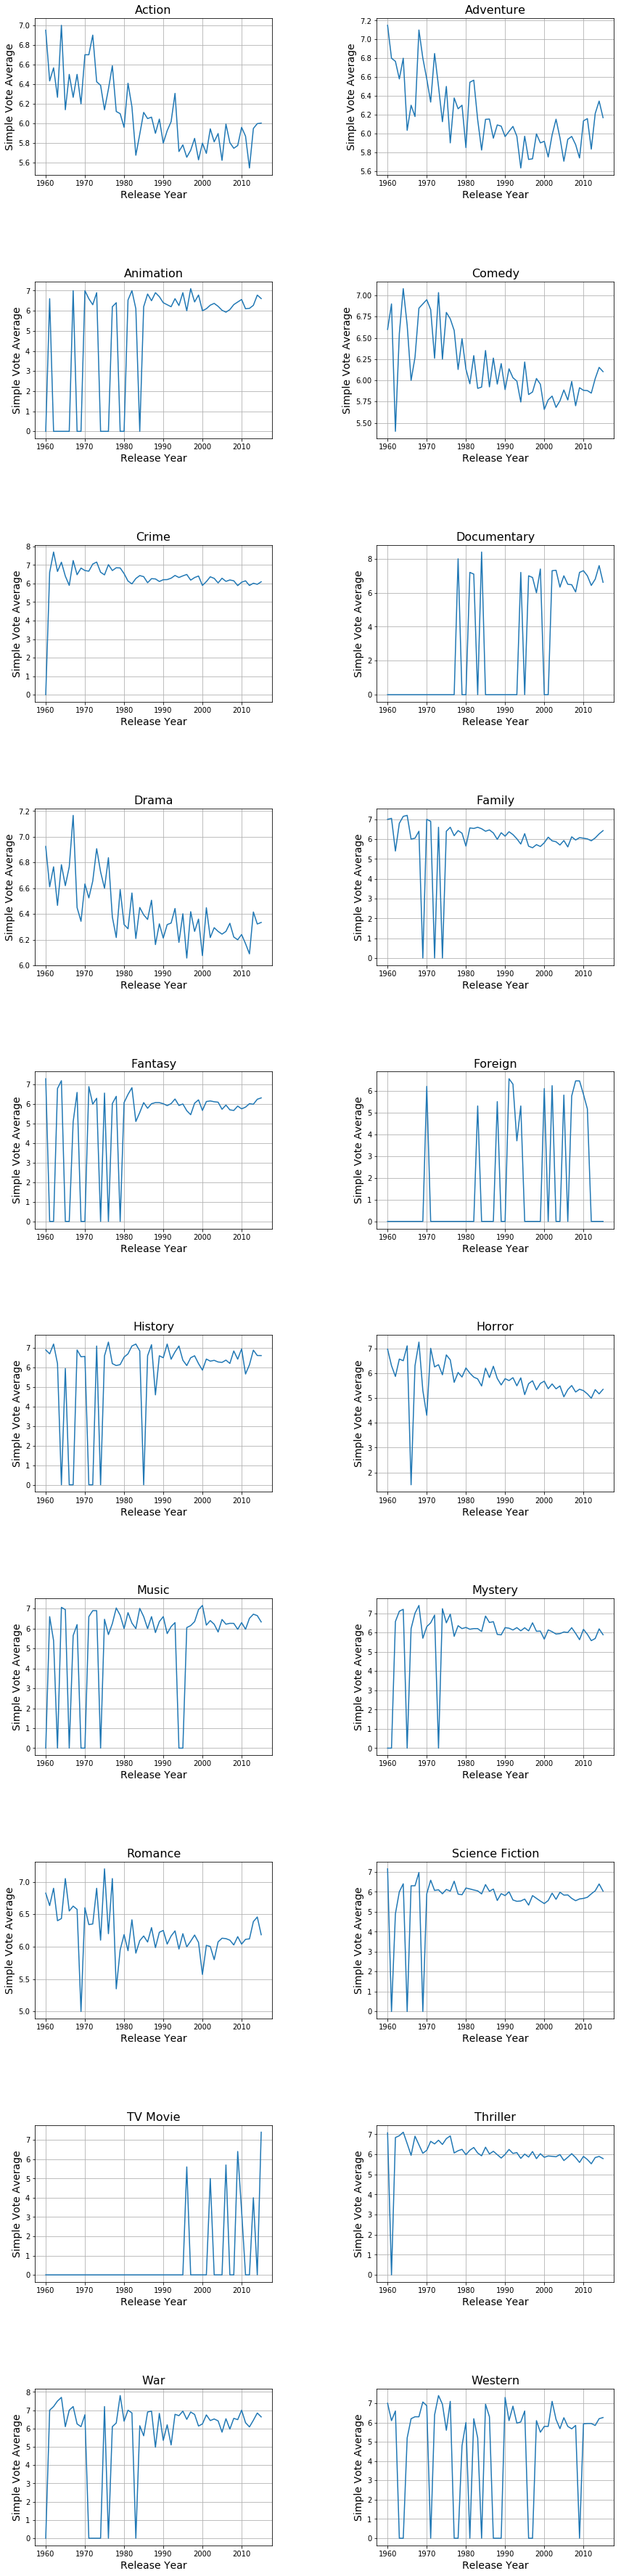

In [47]:
fig, axs = plt.subplots(10, 2)
fig.tight_layout()
fig.set_figwidth(12)
fig.set_figheight(50)
for i, elmt in enumerate(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                          'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                          'Thriller', 'War', 'Western']):
    plt.axes(axs[i // 2][i % 2])
    dftmp[elmt].plot();
    plt.title(elmt)
    plt.ylabel('Simple Vote Average')
    plt.xlabel('Release Year')
    plt.grid(True)

plt.tight_layout(w_pad=10, h_pad=5);

#### Ten most successful production companies

Most categories start off with a little higher vote average in the 60s and then decline to the 90s where they typically stablize or slightly rebound.  It's hard to say why this is.  Some possibilities include:
* The sample size from the 60s to 90s is much smaller, the increasing sample size and vote count for the 90s onward could have resulted in a slightly lower average rating.
* Online databases such as TMDb are relatively new.  It's possible that only good/memorable movies from the 60s - 90s were entered into the database thus skewing the average score higher.

One exception is horror movies - these seem to have trended slightly downward.  This could be because horror movies tend to be the cheapest to produce.  This in turn means a low barrier to entry and the possibility of more low quality movies which score poorly.

Note:  The drop offs to 0 are where there is no data for that year.

In [48]:
dfa = df_join(df, dfprodco)
dfcat_count(dfa, 'production companies', 'production_companies')
dftmp = dfcat_agg(dfa, 'production_companies')
df_stats(dftmp, 'production_companies')

Number of production companies per movie:
 1:  1536
 2:  1470
 3:  1117
 4:  653
5+:  870

Number of unique production companies in this set:  4769

Top 10 production_companies ranked by Total Popularity:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
production_companies,,,,,,
Warner Bros.,408,556.87,273313,6.20,"24,281,184,329.70","71,048,487,651.52"
Universal Pictures,414,456.04,206573,6.13,"19,050,474,580.56","64,321,396,628.04"
Paramount Pictures,345,390.92,176597,6.17,"17,145,279,441.56","57,469,241,874.89"
Twentieth Century Fox Film Corporation,238,328.66,170172,6.14,"13,104,390,946.64","52,247,285,068.56"
Columbia Pictures,227,268.65,137560,6.07,"12,786,450,817.13","33,261,937,490.92"
Walt Disney Pictures,144,252.51,127417,6.25,"11,739,447,380.21","37,340,413,236.81"
New Line Cinema,179,224.68,97057,6.01,"7,202,735,390.13","23,076,041,496.84"
Metro-Goldwyn-Mayer (MGM),160,157.23,53889,6.07,"6,142,257,195.22","20,428,169,187.60"
Legendary Pictures,39,154.76,85947,6.36,"3,869,003,548.90","11,774,264,290.36"




Top 10 production_companies ranked by Total Vote Count:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
production_companies,,,,,,
Warner Bros.,408,556.87,273313,6.20,"24,281,184,329.70","71,048,487,651.52"
Universal Pictures,414,456.04,206573,6.13,"19,050,474,580.56","64,321,396,628.04"
Paramount Pictures,345,390.92,176597,6.17,"17,145,279,441.56","57,469,241,874.89"
Twentieth Century Fox Film Corporation,238,328.66,170172,6.14,"13,104,390,946.64","52,247,285,068.56"
Columbia Pictures,227,268.65,137560,6.07,"12,786,450,817.13","33,261,937,490.92"
Walt Disney Pictures,144,252.51,127417,6.25,"11,739,447,380.21","37,340,413,236.81"
New Line Cinema,179,224.68,97057,6.01,"7,202,735,390.13","23,076,041,496.84"
Legendary Pictures,39,154.76,85947,6.36,"3,869,003,548.90","11,774,264,290.36"
Village Roadshow Pictures,79,151.87,73268,6.04,"5,912,749,968.51","14,272,014,530.03"




Top 10 production_companies ranked by Total Simple Vote Mean:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
production_companies,,,,,,
Arnold Stiefel Company,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"
Beanca Films,1,0.05,11,8.40,"3,744,133.41",0.00
Eficine 226,1,0.05,11,8.40,"3,744,133.41",0.00
Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDECINE),1,0.05,11,8.40,"3,744,133.41",0.00
MPN Cologne Film 3,1,0.05,11,8.40,"3,744,133.41",0.00
Talking Heads,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"
Alfran Productions,1,5.74,3970,8.30,"31,287,365.59","1,277,913,732.39"
Atman Entertainment,1,8.95,5923,8.10,"82,470,329.34","132,022,892.45"
First Thought Films,1,0.05,16,8.10,0.00,"1,339,650.00"




Top 10 production_companies ranked by Total Budget Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
production_companies,,,,,,
Warner Bros.,408,556.87,273313,6.20,"24,281,184,329.70","71,048,487,651.52"
Universal Pictures,414,456.04,206573,6.13,"19,050,474,580.56","64,321,396,628.04"
Paramount Pictures,345,390.92,176597,6.17,"17,145,279,441.56","57,469,241,874.89"
Twentieth Century Fox Film Corporation,238,328.66,170172,6.14,"13,104,390,946.64","52,247,285,068.56"
Columbia Pictures,227,268.65,137560,6.07,"12,786,450,817.13","33,261,937,490.92"
Walt Disney Pictures,144,252.51,127417,6.25,"11,739,447,380.21","37,340,413,236.81"
New Line Cinema,179,224.68,97057,6.01,"7,202,735,390.13","23,076,041,496.84"
Touchstone Pictures,150,121.06,44953,6.13,"6,996,645,146.65","17,870,066,597.14"
Columbia Pictures Corporation,124,112.15,43086,6.09,"6,550,125,818.63","18,118,357,259.13"




Top 10 production_companies ranked by Total Revenue Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
production_companies,,,,,,
Warner Bros.,408,556.87,273313,6.20,"24,281,184,329.70","71,048,487,651.52"
Universal Pictures,414,456.04,206573,6.13,"19,050,474,580.56","64,321,396,628.04"
Paramount Pictures,345,390.92,176597,6.17,"17,145,279,441.56","57,469,241,874.89"
Twentieth Century Fox Film Corporation,238,328.66,170172,6.14,"13,104,390,946.64","52,247,285,068.56"
Walt Disney Pictures,144,252.51,127417,6.25,"11,739,447,380.21","37,340,413,236.81"
Columbia Pictures,227,268.65,137560,6.07,"12,786,450,817.13","33,261,937,490.92"
New Line Cinema,179,224.68,97057,6.01,"7,202,735,390.13","23,076,041,496.84"
Amblin Entertainment,61,121.38,65113,6.44,"4,294,582,984.99","21,299,244,854.09"
Metro-Goldwyn-Mayer (MGM),160,157.23,53889,6.07,"6,142,257,195.22","20,428,169,187.60"


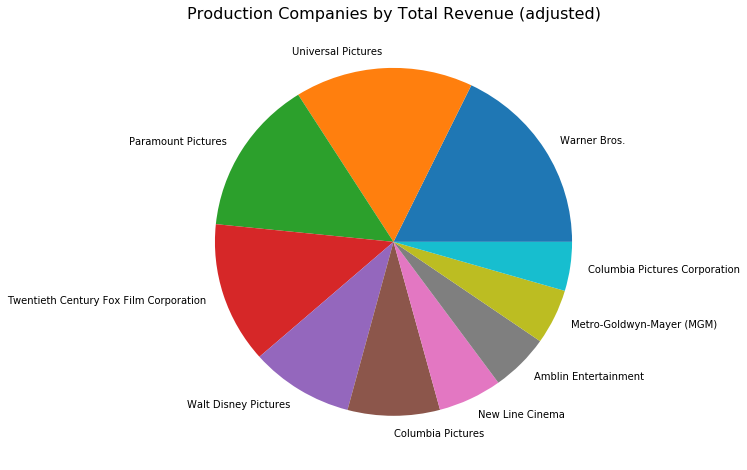

In [49]:
# Visual of top 10 producation companies by revenue, adjusted
dfa = df_join(df, dfprodco)
dfagg = dfcat_agg(dfa, 'production_companies')
#df_stats(dftmp, 'directors')

dftmp = dfagg.nlargest(10, 'total_revenue_adj')['total_revenue_adj']
dftmp.name = ''
dftmp.plot(kind='pie', figsize=(8, 8), title='Production Companies by Total Revenue (adjusted)');

#### Ten most popular actors/actresses

In [50]:
dfa = df_join(df, dfcast)
dfcat_count(dfa, 'cast')
dftmp = dfcat_agg(dfa, 'cast')
df_stats(dftmp, 'cast')

Number of cast per movie:
 1:  7
 2:  4
 3:  12
 4:  50
5+:  5573

Number of unique cast in this set:  9901

Top 10 cast ranked by Total Popularity:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
cast,,,,,,
Samuel L. Jackson,54,86.09,44335,6.18,"2,865,955,401.49","7,977,070,675.87"
Harrison Ford,37,78.70,36716,6.44,"2,560,277,281.56","14,683,483,145.71"
Robert De Niro,63,74.71,30730,6.40,"2,871,290,006.31","6,613,766,858.20"
Brad Pitt,36,74.44,44771,6.72,"2,519,643,733.26","7,635,642,285.60"
Michael Caine,30,74.41,38879,6.44,"1,922,739,241.57","5,722,742,597.15"
Bruce Willis,57,73.76,43836,5.93,"3,352,544,659.59","8,253,035,472.30"
Johnny Depp,39,69.24,39648,6.48,"3,279,811,097.86","8,563,851,006.54"
Tom Hardy,13,65.21,31585,6.62,"878,547,378.14","2,854,136,117.60"
Scarlett Johansson,25,64.65,39363,6.56,"1,477,996,226.20","5,884,583,873.92"




Top 10 cast ranked by Total Vote Count:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
cast,,,,,,
Leonardo DiCaprio,20,58.55,47543,7.04,"1,719,926,277.95","7,232,546,473.39"
Brad Pitt,36,74.44,44771,6.72,"2,519,643,733.26","7,635,642,285.60"
Robert Downey Jr.,30,52.74,44526,6.35,"1,898,874,938.11","7,426,894,346.54"
Samuel L. Jackson,54,86.09,44335,6.18,"2,865,955,401.49","7,977,070,675.87"
Bruce Willis,57,73.76,43836,5.93,"3,352,544,659.59","8,253,035,472.30"
Ian McKellen,17,59.50,43320,6.66,"2,075,084,709.11","8,671,322,793.00"
Tom Hanks,38,63.39,39883,6.65,"2,355,921,282.07","10,672,385,155.22"
Johnny Depp,39,69.24,39648,6.48,"3,279,811,097.86","8,563,851,006.54"
Scarlett Johansson,25,64.65,39363,6.56,"1,477,996,226.20","5,884,583,873.92"




Top 10 cast ranked by Total Simple Vote Mean:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
cast,,,,,,
Arcelia RamÃ­rez,1,0.05,11,8.40,"3,744,133.41",0.00
Chris Frantz,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"
David Byrne,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"
Franziska Kruse,1,0.05,11,8.40,"3,744,133.41",0.00
Hector Kotsifakis,1,0.05,11,8.40,"3,744,133.41",0.00
Jerry Harrison,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"
RÃ¼diger Evers,1,0.05,11,8.40,"3,744,133.41",0.00
Steven Scales,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"
Tina Weymouth,1,0.28,23,8.40,"2,518,850.45","10,450,966.59"




Top 10 cast ranked by Total Budget Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
cast,,,,,,
Bruce Willis,57,73.76,43836,5.93,"3,352,544,659.59","8,253,035,472.30"
Johnny Depp,39,69.24,39648,6.48,"3,279,811,097.86","8,563,851,006.54"
Nicolas Cage,56,57.24,22525,5.79,"2,872,865,357.60","5,720,664,357.10"
Robert De Niro,63,74.71,30730,6.40,"2,871,290,006.31","6,613,766,858.20"
Samuel L. Jackson,54,86.09,44335,6.18,"2,865,955,401.49","7,977,070,675.87"
Tom Cruise,34,58.29,32926,6.44,"2,813,302,841.51","11,212,800,243.23"
Eddie Murphy,37,34.25,12829,5.66,"2,720,133,785.60","8,572,389,604.53"
Harrison Ford,37,78.70,36716,6.44,"2,560,277,281.56","14,683,483,145.71"
Brad Pitt,36,74.44,44771,6.72,"2,519,643,733.26","7,635,642,285.60"




Top 10 cast ranked by Total Revenue Adj:

,counts,total_popularity,total_vote_count,total_simple_vote_mean,total_budget_adj,total_revenue_adj
cast,,,,,,
Harrison Ford,37,78.70,36716,6.44,"2,560,277,281.56","14,683,483,145.71"
Tom Cruise,34,58.29,32926,6.44,"2,813,302,841.51","11,212,800,243.23"
Tom Hanks,38,63.39,39883,6.65,"2,355,921,282.07","10,672,385,155.22"
Emma Watson,13,53.49,33012,6.77,"1,578,040,455.95","8,806,337,401.56"
Ian McKellen,17,59.50,43320,6.66,"2,075,084,709.11","8,671,322,793.00"
Eddie Murphy,37,34.25,12829,5.66,"2,720,133,785.60","8,572,389,604.53"
Johnny Depp,39,69.24,39648,6.48,"3,279,811,097.86","8,563,851,006.54"
Daniel Radcliffe,13,51.16,30395,6.88,"1,444,162,552.68","8,515,082,234.94"
Rupert Grint,9,47.42,28599,7.20,"1,383,749,700.62","8,358,340,712.60"


### Research Question Set 2
* What kinds of properties are associated with high revenue movies? (dependent variable)
    * directors, genres, production companies, cast (features with multiple values - independent variables)
    * runtime, budget, release month (features with single value - independent variables)

In [51]:
col_enum(df)

0-id, 1-popularity, 2-original_title, 3-overview, 4-runtime, 5-release_date, 6-vote_count, 7-vote_average, 
8-release_year, 9-budget_adj, 10-revenue_adj, 11-release_month, 12-margin


* Define high revenue as top 1,000 movies by revenue, adjusted
* Also require a budget of at least 10,000 to filter out questionable data

In [52]:
df = df.query('budget_adj > 10_000').nlargest(1000, 'revenue_adj')

In [53]:
# Look at correlation between features using Pearson's R
df.iloc[:, np.r_[1:2, 4:5, 6:8, 9:13]].corr()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,release_month,margin
popularity,1.00,0.18,0.71,0.34,0.28,0.42,-0.03,0.08
runtime,0.18,1.00,0.25,0.37,0.27,0.23,0.16,-0.07
vote_count,0.71,0.25,1.00,0.46,0.41,0.53,-0.09,0.09
vote_average,0.34,0.37,0.46,1.00,-0.10,0.32,0.17,0.37
budget_adj,0.28,0.27,0.41,-0.10,1.00,0.33,-0.07,-0.59
revenue_adj,0.42,0.23,0.53,0.32,0.33,1.00,-0.01,0.35
release_month,-0.03,0.16,-0.09,0.17,-0.07,-0.01,1.00,0.07
margin,0.08,-0.07,0.09,0.37,-0.59,0.35,0.07,1.00


Using the following scale:
* \>= .7 - strong correlation
* \>= .5 - moderate correlation
* \>= .3 - weak correlation
Based on [this reference](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
<br>
#### Correlation Findings
<table>
    <tr>
        <th></th>
        <th>Popularity</th>
        <th>Runtime</th>
        <th>Vote Count</th>
        <th>Vote Average</th>
        <th>Budget, Adjusted</th>
        <th>Revenue, Adjusted</th>
        <th>Release Month</th>
        <th>Margin</th>
    </tr>
    <tr>
        <td>Popularity</td>
        <td>-</td>
        <td>-</td>
        <td>Strong</td>
        <td>Weak</td>
        <td>-</td>
        <td>Weak</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Runtime</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Vote Count</td>
        <td>Strong</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
        <td>Weak</td>
        <td>Moderate</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Vote Average</td>
        <td>Weak</td>
        <td>Weak</td>
        <td>Weak</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
        <td>-</td>
        <td>Weak</td>
    </tr>
    <tr>
        <td>Budget, Adjusted</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
        <td>-</td>
        <td>Negative, Moderate</td>
    </tr>
    <tr>
        <td>Revenue, Adjusted</td>
        <td>Weak</td>
        <td>-</td>
        <td>Moderate</td>
        <td>Weak</td>
        <td>Weak</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
    </tr>
    <tr>
        <td>Release Month</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Margin</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>Weak</td>
        <td>Negative, Moderate</td>
        <td>Weak</td>
        <td>-</td>
        <td>-</td>
    </tr>
</table>


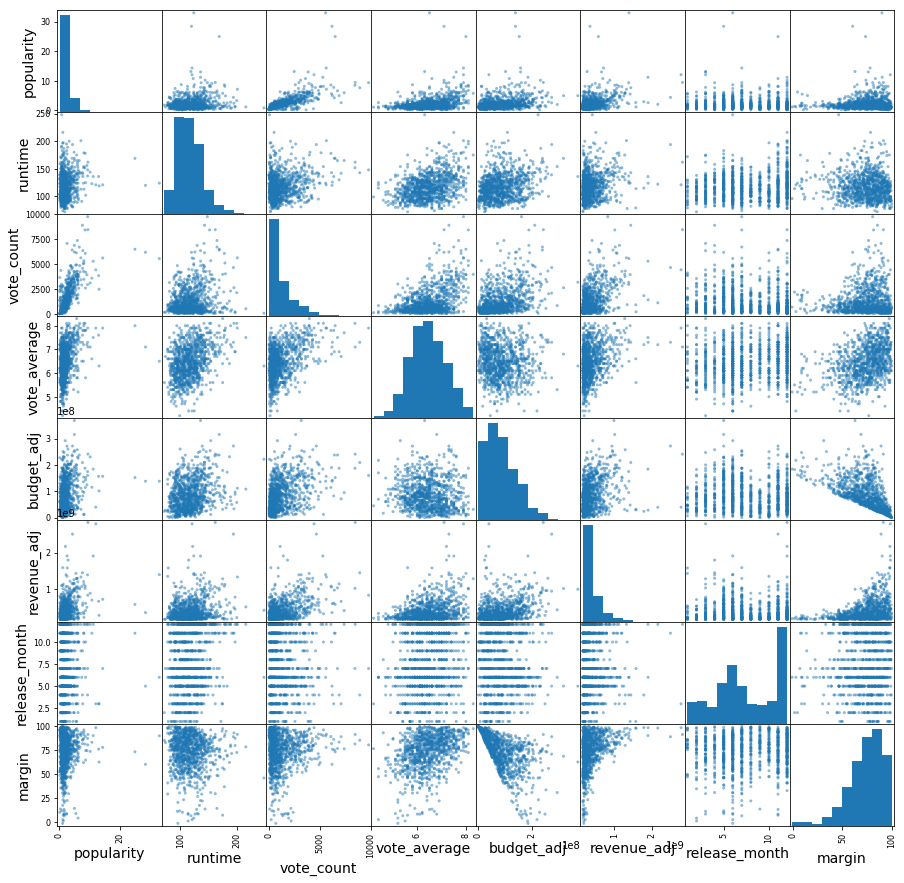

In [54]:
# Look at correlation between features visually
pd.plotting.scatter_matrix(df.iloc[:, np.r_[1:2, 4:5, 6:8, 9:13]], figsize=(15, 15));

* Vote Count appears to be moderately correlated with higher revenue movies
* Popularity, Vote Average, Budget, Adjusted, and Margin appear to be weakly correlated with higher revenue movies

In [55]:
# Most used/popular directors, genres, production companies, cast (features with multiple
# values - independent variables)
for elmt, dfcat in [('director', dfdir), ('production_companies', dfprodco), ('cast', dfcast),
                    ('genres', dfgenres)]:
    category = elmt.replace('_', ' ')
    dfcnt = df.merge(dfcat, on='id')[elmt]
    top = dfcnt.value_counts()[:15]
    cat_num = len(dfcnt)
    cat_dist = dfcnt.value_counts()/cat_num * 100
    out_spacing = ' ' * (abs(top.index.str.len().max() - len(category)) + 3)

    print(f'Top fifteen most used/popular {category}:')
    print(top.to_string())
    print(f'\n{category.title()}{out_spacing}Percentage:\n{cat_dist[:15].to_string()}')
    print(f'\nAll other {category} percentage:  {cat_dist[15:].sum():.2f}\n\n')

Top fifteen most used/popular director:
Steven Spielberg    21
Robert Zemeckis     12
Ridley Scott        10
Michael Bay         10
Clint Eastwood       9
Tim Burton           8
Roland Emmerich      8
Tony Scott           8
Ron Howard           8
Brett Ratner         7
Richard Donner       7
James Cameron        7
Peter Jackson        7
Chris Columbus       7
Gore Verbinski       7

Director           Percentage:
Steven Spielberg   1.89
Robert Zemeckis    1.08
Ridley Scott       0.90
Michael Bay        0.90
Clint Eastwood     0.81
Tim Burton         0.72
Roland Emmerich    0.72
Tony Scott         0.72
Ron Howard         0.72
Brett Ratner       0.63
Richard Donner     0.63
James Cameron      0.63
Peter Jackson      0.63
Chris Columbus     0.63
Gore Verbinski     0.63

All other director percentage:  87.74


Top fifteen most used/popular production companies:
Warner Bros.                              132
Universal Pictures                        124
Paramount Pictures                    

* There does appear to be some concentration of directors for high revenue movies
* The concentration for production companies is more pronounced
* For cast there are favorites but the concentration is much smaller with a gradual run off
* For genres the top 5 constitue the bulk of the high revenue movies

In [56]:
# Helper function
def elmt_analysis(df, elmt, unit):
    category = elmt.replace('_', ' ')
    dfcnt = df[elmt]

    print(f'Descriptive statistics for {category}:\n{dfcnt.describe().to_string()}\n\n')
    print(f'80% of the top 1,000 movies by {category} are between {dfcnt.quantile(.1):,.0f} and '
          f'{dfcnt.quantile(.9):,.0f} {unit}.\n')
    
    # Histogram
    plot_title = category.title()
    plt.title(f'{plot_title} Distribution')
    plt.xlabel(f'{plot_title}')
    plt.ylabel('Percentage')
    plt.grid(True)
    dfcnt.hist(density=True, bins=20);

Descriptive statistics for runtime:
count   1,000.00
mean      117.33
std        22.70
min        72.00
25%       100.00
50%       115.00
75%       130.00
max       248.00


80% of the top 1,000 movies by runtime are between 91 and 145 minutes.



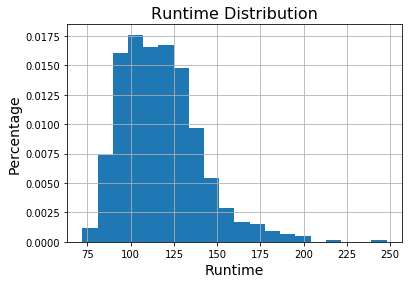

In [57]:
# Analyze runtime
elmt_analysis(df, 'runtime', 'minutes')

Descriptive statistics for budget adj:
count         1,000.00
mean     85,852,991.94
std      56,225,619.83
min          15,775.03
25%      41,375,777.87
50%      76,417,194.22
75%     120,135,910.07
max     368,371,256.18


80% of the top 1,000 movies by budget adj are between 23,082,914 and 163,472,605 dollars.



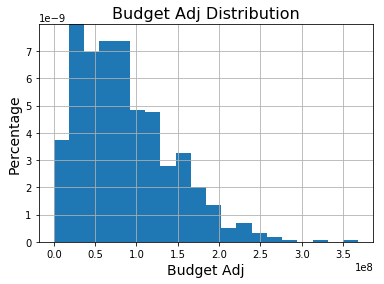

In [58]:
# Analyze budget
elmt_analysis(df, 'budget_adj', 'dollars')

Distribution of movies by release month (percentage):
6    16.30
12   15.90
5    11.40
11   11.20
7    10.70
10    6.50
3     6.40
8     5.60
9     5.20
4     4.60
2     4.30
1     1.90


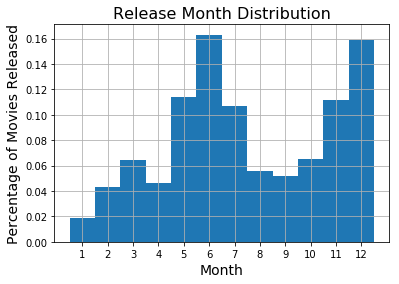

In [59]:
dfcnt = df['release_month']
cat_dist = dfcnt.value_counts()/len(dfcnt) * 100
print(f'Distribution of movies by release month (percentage):\n{cat_dist.to_string()}')
plt.title('Release Month Distribution')
plt.xlabel('Month')
plt.ylabel('Percentage of Movies Released')
dfcnt.hist(density=True, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]);

* Clearly June and December are the top months for high revenue movies
* Surrounding months for June are also high volume months
* Adjacent months are different for December though - while November is a high volume month, January is completely dead!

<a id='conclusions'></a>
## Conclusions

This analysis used basic descriptive statistics to analyze a corpus of movies from TMDb.  This allows teasing out top movies by various criteria.  It further allows identifying top directors, most popular genres, top production companies, and most popular actors/actresses.  Using correlations, visualizations, and more basic statistics we can also make some educated guesses about features related to high revenues movies.


Limitations:
* Quite a few Null values are present in the data
  * e.g., Over 1,000 entries with no production company info
* Quite a few invalid or questionable entries
  * e.g., Budget, Revenue, and/or Runtime of 0
* Removed entries with Null (no data) for:
  * cast, director, and production_companies
* After pruning entries with Null values, also found a duplicate entry (which was removed for this analysis)
* Basic data cleaning resulted in removing almost half of the entries (over 5,000 entries removed)
* Because some movies have an adjusted budget or revenue of 0 (after above cleaning) it makes analyzing movie margins tricky
  * e.g., a movie with a budget of 0 and any revenue has a margin of 100%; a movie with any budget and no revenue has a margin of negative infinity
